In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D','axial', 'toy-cleaned')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            


In [3]:
def normalize(image):
    image = image.astype(np.float32)
    return (image - np.nanmean(image)) / np.nanstd(image)

In [4]:
axial_wv = convert_to_wavelet_basis(data_dir, "gray", image_func = normalize, debug=True, image_opener = npz_opener)


axial_wv['data'] = axial_wv['data'].apply(lambda x: x[~np.isnan(x)])
axial_wv['size'] = axial_wv['data'].apply(lambda x : len(x))
axial_wv

9 layers being used


100%|██████████| 999/999 [00:17<00:00, 56.56it/s]


,channel,layer,frequency,orientation,data,size
0,gray,1,0.110679,L1,[],0
1,gray,2,0.124514,D,[],0
2,gray,2,0.124514,H,[],0
3,gray,2,0.124514,V,[],0
4,gray,3,0.142301,D,"[-20.506237, -17.347599, -20.336111, -21.16555...",348
5,gray,3,0.142301,H,"[-51.349064, -41.302086, -35.31418, -50.860184...",348
6,gray,3,0.142301,V,"[6.566966, 0.2545278, -21.759844, -5.3579783, ...",348
7,gray,4,0.166018,D,"[8.61837, -0.8727894, -3.7174215, -7.555401, -...",9865
8,gray,4,0.166018,H,"[-21.62446, 6.934769, -6.4071074, 13.735394, 2...",9865
9,gray,4,0.166018,V,"[-6.6503496, -18.891474, 24.065811, -8.3365, 1...",9865


In [5]:
axial_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = axial_wv[axial_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    axial_df = pd.concat([axial_df, ks_df], axis = 0)
axial_df

C:\Users\riyap\AppData\Local\Temp\ipykernel_39644\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_39644\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_39644\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_39644\930252424.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA co

,Layer,First,Second,KS_Stat,Pvalue
0,2,D,H,NaN,NaN
1,2,D,V,NaN,NaN
2,2,H,V,NaN,NaN
1,3,D,V,0.356322,5.169616e-20
0,3,D,H,0.870690,3.250332e-137
2,3,H,V,0.933908,1.292986e-165
0,4,D,H,0.041257,1.015866e-07
2,4,H,V,0.161176,3.336617e-112
1,4,D,V,0.192296,7.830385e-160
2,5,H,V,0.065673,1.546686e-98


c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserW

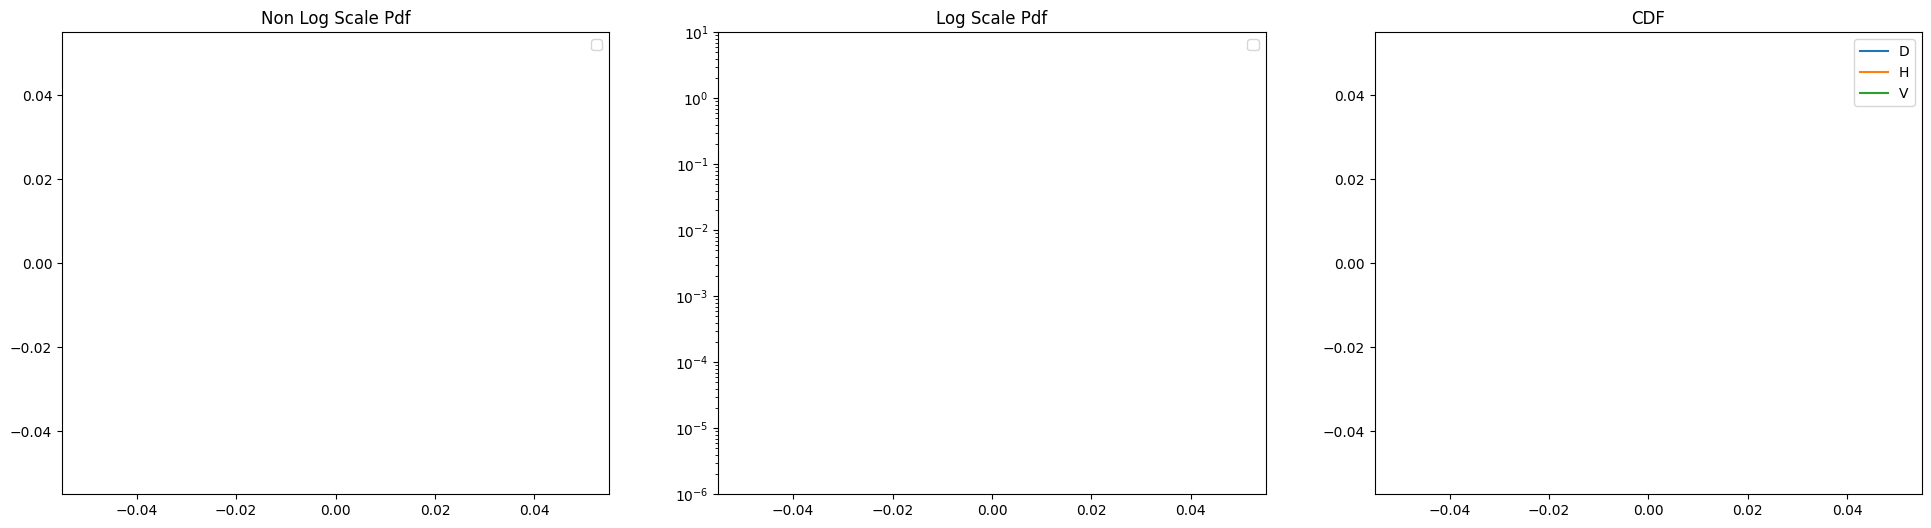

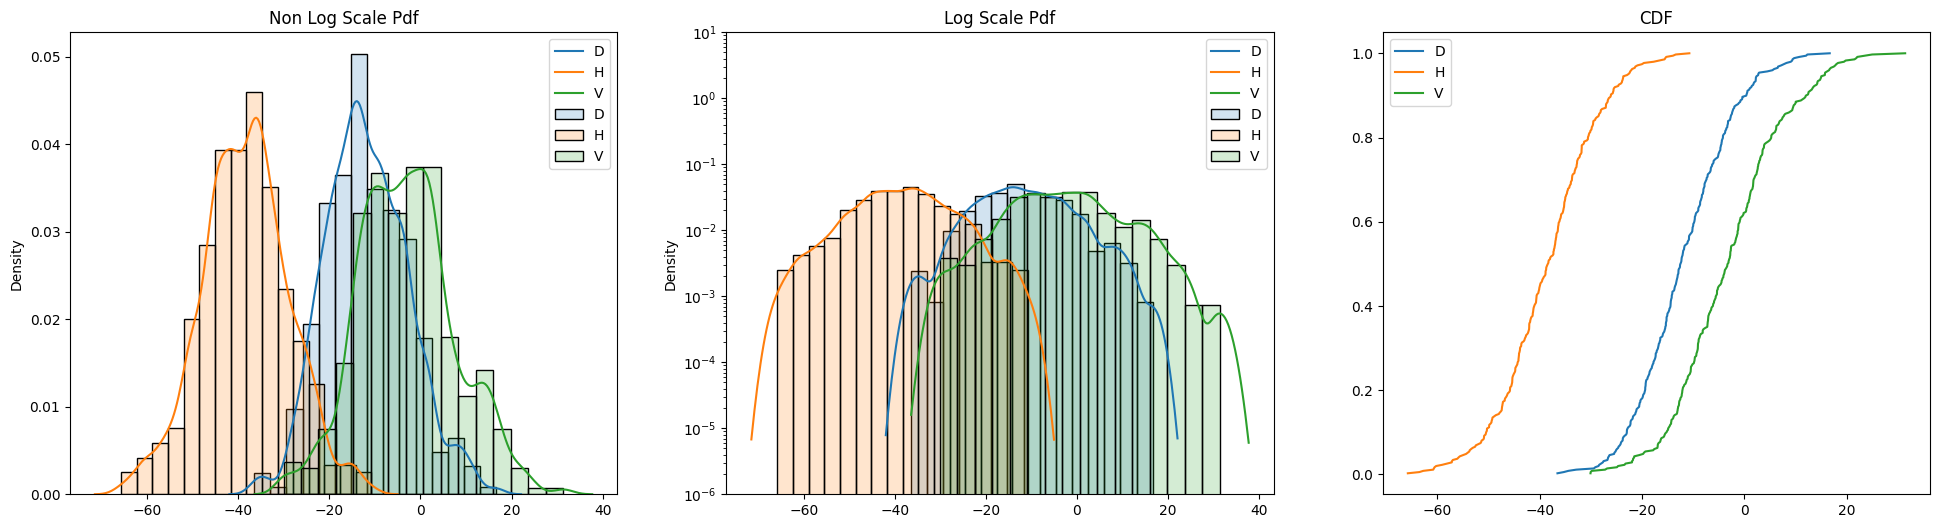

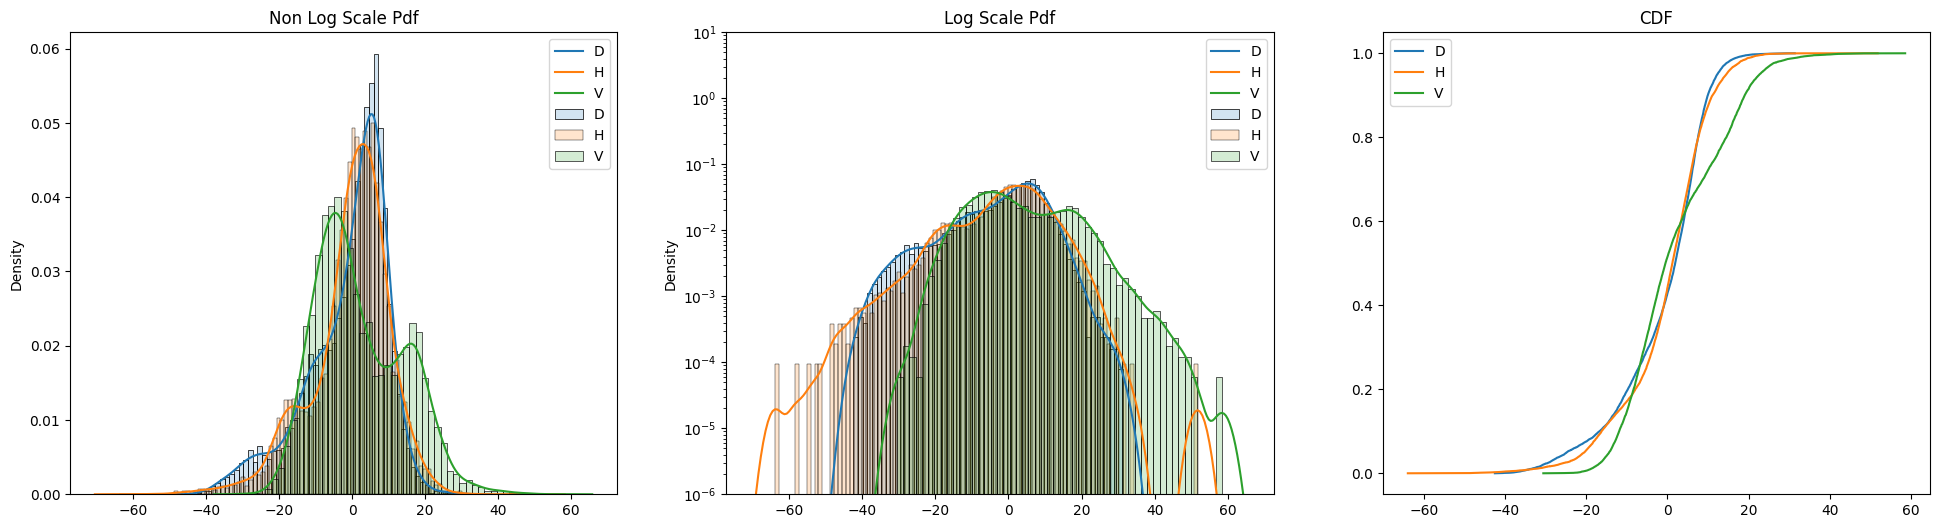

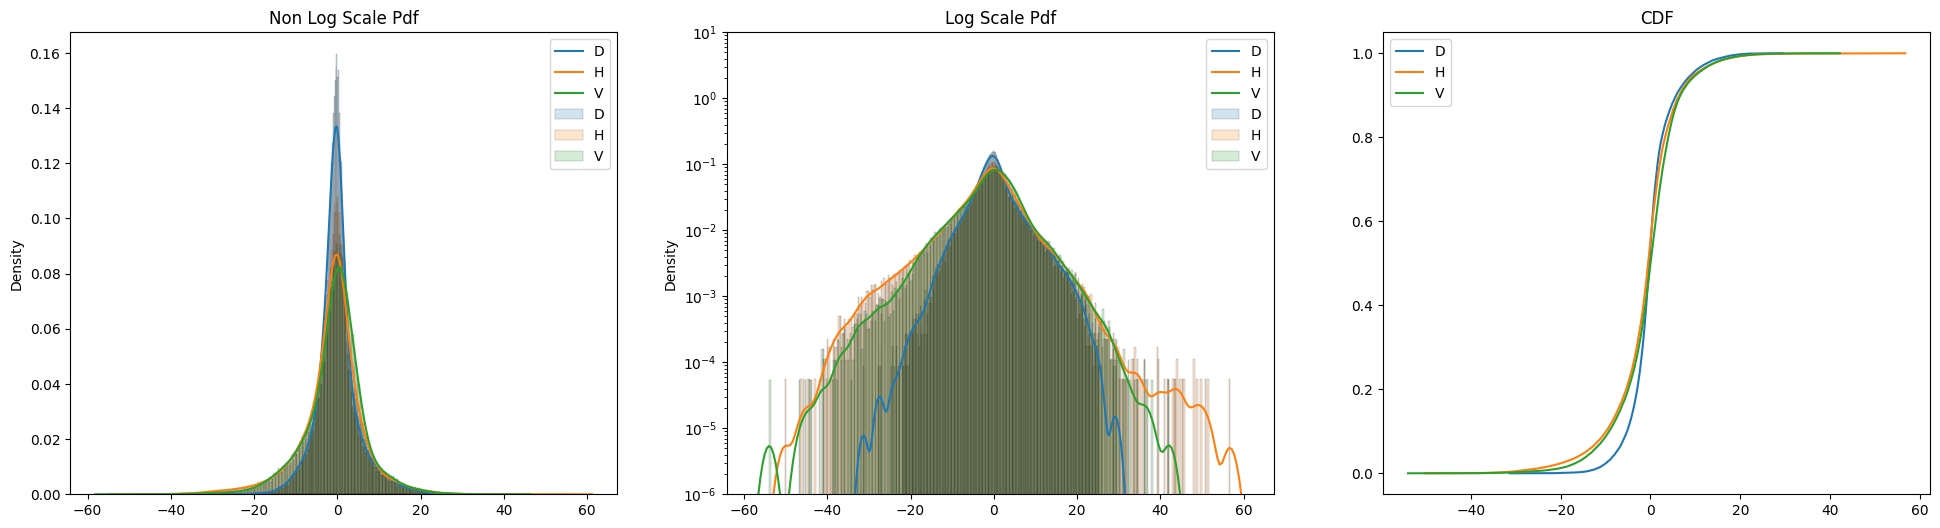

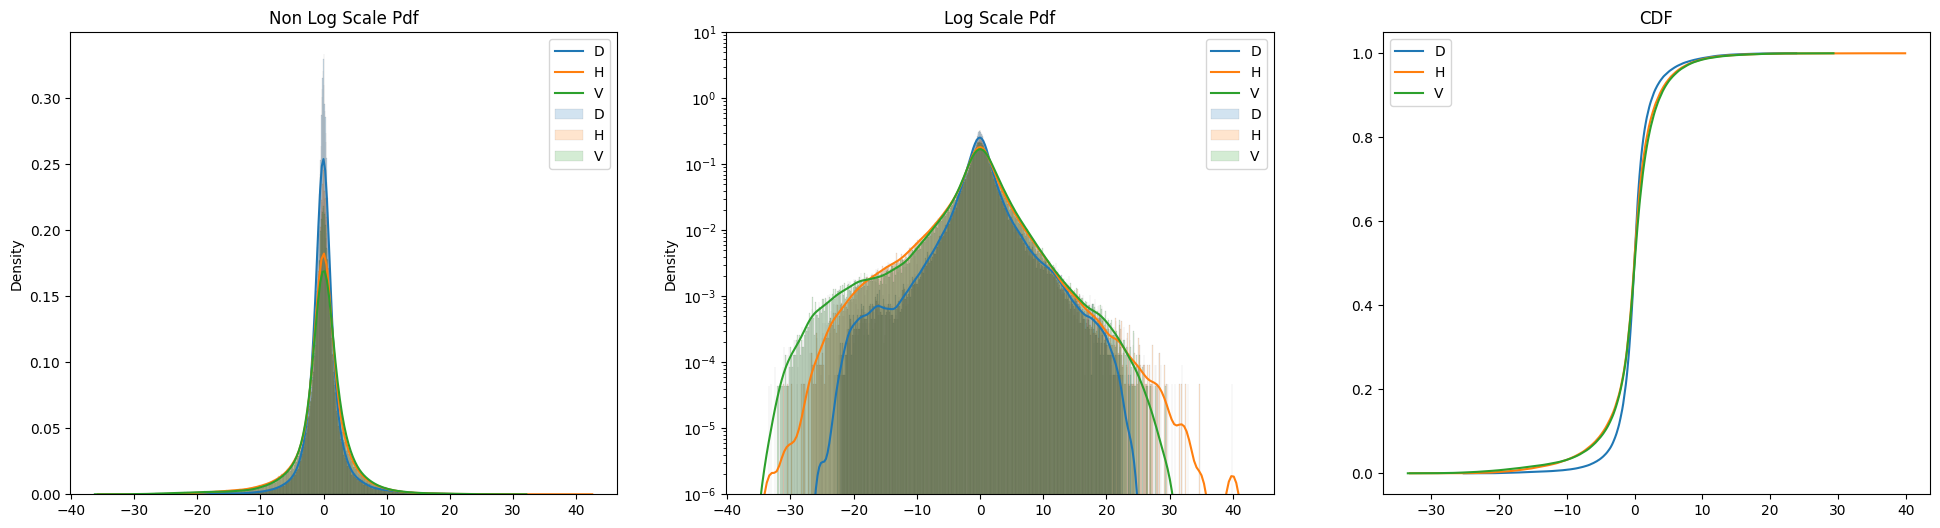

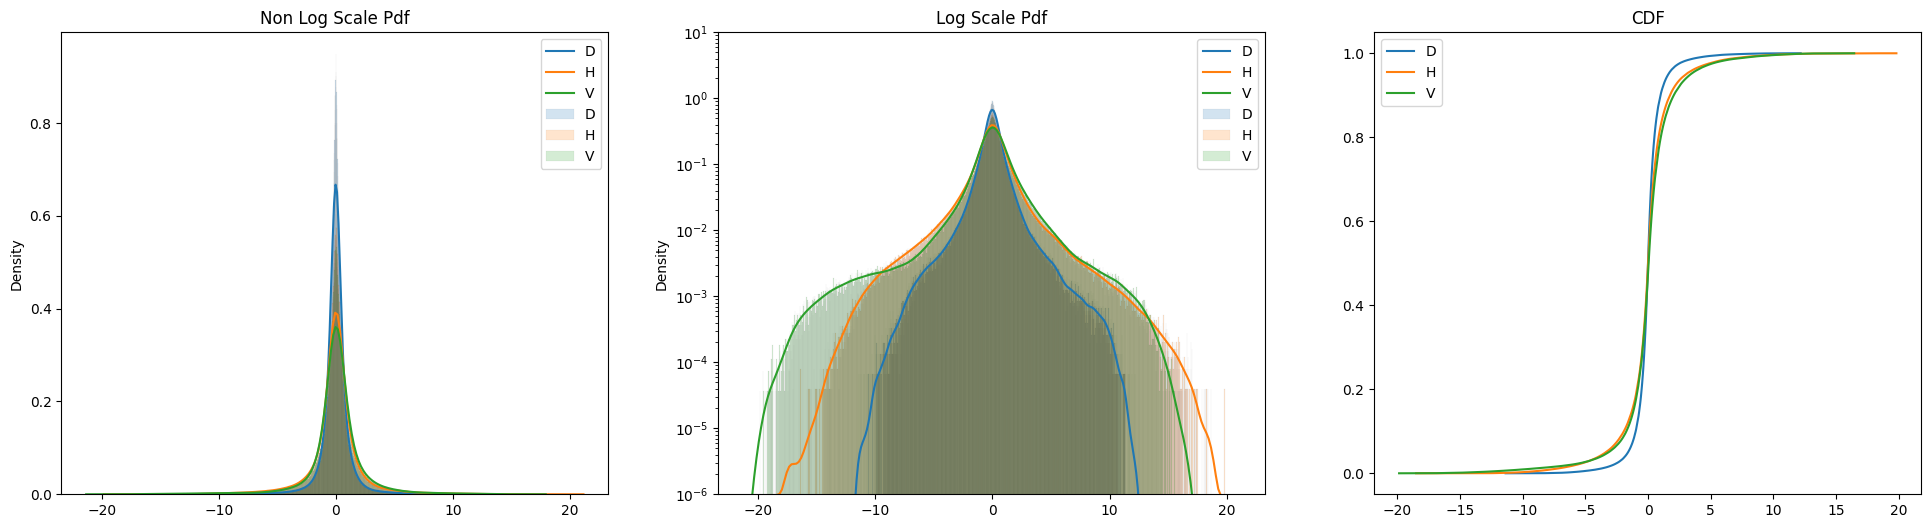

c:\Users\riyap\anaconda3\envs\HBMV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


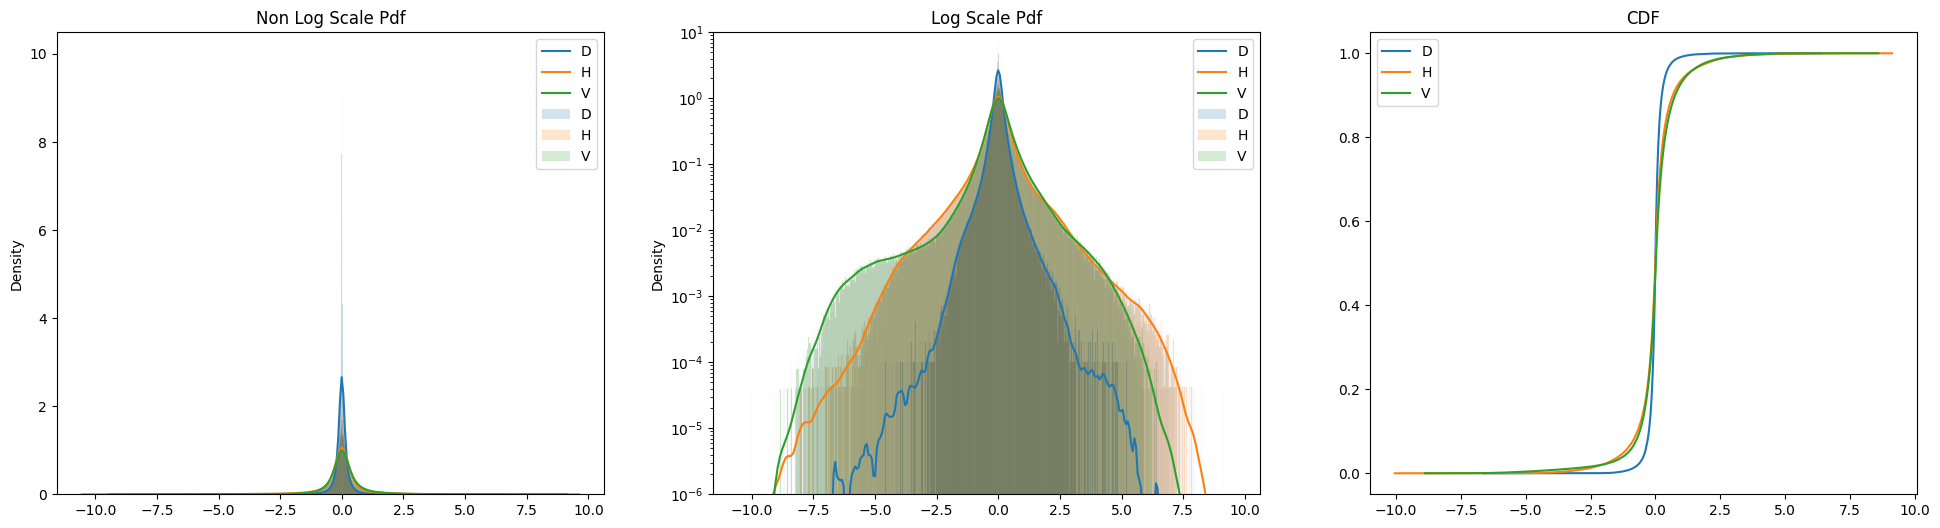

In [6]:
for i in range(2, LAYER_MAX):
    layer_df = axial_wv[axial_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)